<a href="https://colab.research.google.com/github/Alfikriangelo/MachineLearningTasks/blob/main/1stWeekTask/Income_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
#import library
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [70]:
# Memuat dataset
file_path = "sample_data/income.csv"
df = pd.read_csv(file_path)

In [71]:
# Membersihkan kolom target
if 'income' in df.columns:
    df['income'] = df['income'].str.replace('.', '', regex=False)
    df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})

In [72]:
# Mengenkripsi variabel kategorikal
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [73]:
# Mendefinisikan fitur dan target
X = df.drop(columns=['income'])
y = df['income']

In [74]:
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [75]:
# Menormalisasi fitur numerik
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [76]:
# Mengonversi data ke dalam bentuk tensor PyTorch
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

In [77]:
# Membuat DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [78]:
# Mendefinisikan model PyTorch
class IncomeClassifier(nn.Module):
    def __init__(self, input_size):
        super(IncomeClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x

In [79]:
# Inisialisasi model, fungsi loss, dan optimizer
input_size = X_train.shape[1]
model = IncomeClassifier(input_size)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [80]:
# Melatih model PyTorch
epochs = 10
for epoch in range(epochs):
    model.train()
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()

In [81]:
# Mengevaluasi model PyTorch
model.eval()
y_pred = []
y_true = []
with torch.no_grad():
    for batch_X, batch_y in test_loader:
        outputs = model(batch_X)
        predicted = (outputs > 0.5).float()
        y_pred.extend(predicted.numpy())
        y_true.extend(batch_y.numpy())

In [82]:
# Menghitung metrik evaluasi
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
auc = roc_auc_score(y_true, y_pred)

In [83]:
# Mendefinisikan model TensorFlow
tf_model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(input_size,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [84]:
# Mengompilasi model TensorFlow
tf_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [85]:
# Melatih model TensorFlow
tf_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1, validation_data=(X_test, y_test))

Epoch 1/10
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8114 - loss: 0.3970 - val_accuracy: 0.8433 - val_loss: 0.3306
Epoch 2/10
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8464 - loss: 0.3262 - val_accuracy: 0.8500 - val_loss: 0.3237
Epoch 3/10
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8476 - loss: 0.3250 - val_accuracy: 0.8468 - val_loss: 0.3242
Epoch 4/10
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8528 - loss: 0.3187 - val_accuracy: 0.8501 - val_loss: 0.3203
Epoch 5/10
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8509 - loss: 0.3166 - val_accuracy: 0.8507 - val_loss: 0.3175
Epoch 6/10
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8520 - loss: 0.3143 - val_accuracy: 0.8505 - val_loss: 0.3181
Epoch 7/10
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8547 - loss: 0.3142 - val_accuracy: 0.8502 - val_loss: 0.3183
Epoch 8/10
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8531 - loss: 0.3132 - 

In [86]:
# Mengevaluasi model TensorFlow
y_pred_tf = (tf_model.predict(X_test) > 0.5).astype('int32')
accuracy_tf = accuracy_score(y_test, y_pred_tf)
precision_tf = precision_score(y_test, y_pred_tf)
recall_tf = recall_score(y_test, y_pred_tf)
f1_tf = f1_score(y_test, y_pred_tf)
auc_tf = roc_auc_score(y_test, y_pred_tf)

306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


**1. Accuracy (Akurasi)**


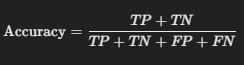



Penjelasan:

- Akurasi mengukur seberapa sering model memprediksi dengan benar.
- TP (True Positive): Prediksi positif yang benar.
- TN (True Negative): Prediksi negatif yang benar.
- FP (False Positive): Prediksi positif yang salah.
- FN (False Negative): Prediksi negatif yang salah.
- Semakin tinggi akurasi, semakin baik model dalam mengklasifikasikan data.



**2. Precision (Presisi)**


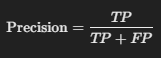



Penjelasan:

- Presisi mengukur seberapa banyak prediksi positif yang benar dibandingkan dengan semua prediksi positif yang dibuat oleh model.
- Berguna dalam kasus ketika FP (False Positive) harus dikurangi, misalnya dalam deteksi penyakit.

**3. Recall (Sensitivitas)**

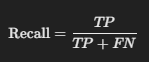


Penjelasan:

- Recall mengukur seberapa banyak dari total kasus positif yang berhasil dideteksi oleh model.
- Berguna dalam kasus di mana FN (False Negative) harus dikurangi, misalnya dalam deteksi kanker.

**4. F1 Score**


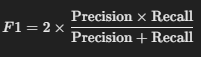


Penjelasan:
- F1 Score adalah rata-rata harmonik dari Precision dan Recall.
- Berguna jika kita ingin keseimbangan antara Precision dan Recall.

**5. Area Under Curve (AUC-ROC)**


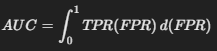



Penjelasan:
- AUC-ROC (Area Under the Receiver Operating Characteristic Curve) mengukur kemampuan model dalam membedakan antara kelas positif dan negatif di berbagai threshold.
- Semakin tinggi nilai AUC, semakin baik model dalam memisahkan kelas.

In [87]:
# Menampilkan hasil evaluasi
print("Model PyTorch:")
print(f"Akurasi: {accuracy}, Presisi: {precision}, Recall: {recall}, F1 Score: {f1}, AUC: {auc}")
print("\nModel TensorFlow:")
print(f"Akurasi: {accuracy_tf}, Presisi: {precision_tf}, Recall: {recall_tf}, F1 Score: {f1_tf}, AUC: {auc_tf}")

Model PyTorch:
Akurasi: 0.8546422356433616, Presisi: 0.7709563164108618, Recall: 0.5585970915312233, F1 Score: 0.6478174603174603, AUC: 0.7531916960818544

Model TensorFlow:
Akurasi: 0.8495240045040434, Presisi: 0.7152777777777778, Recall: 0.6167664670658682, F1 Score: 0.662379421221865, AUC: 0.7697612445677882


Dari hasil perbandingan:  

- **Akurasi PyTorch (85.46%) sedikit lebih tinggi dibandingkan TensorFlow (84.95%)**, menunjukkan bahwa model PyTorch lebih sering memberikan prediksi yang benar secara keseluruhan.  
- **Presisi PyTorch (0.7709) lebih tinggi dibandingkan TensorFlow (0.7153)**, artinya model PyTorch lebih baik dalam menghindari kesalahan positif (False Positives).  
- **Recall TensorFlow (0.6168) lebih tinggi dibandingkan PyTorch (0.5586)**, menunjukkan bahwa model TensorFlow lebih baik dalam menangkap lebih banyak kasus positif dan mengurangi kesalahan negatif (False Negatives).  
- **F1 Score TensorFlow (0.6624) lebih tinggi dibandingkan PyTorch (0.6478)**, menunjukkan bahwa model TensorFlow memiliki keseimbangan presisi dan recall yang lebih baik.  
- **AUC TensorFlow (0.7698) lebih tinggi dibandingkan PyTorch (0.7532)**, menunjukkan bahwa model TensorFlow memiliki performa pemisahan kelas yang sedikit lebih baik secara keseluruhan.



Secara keseluruhan, TensorFlow lebih unggul dalam keseimbangan performa dan generalisasi, sementara PyTorch lebih baik dalam prediksi yang lebih presisi. Pemilihan model tergantung pada kebutuhan spesifik dan trade-off antara presisi dan recall.

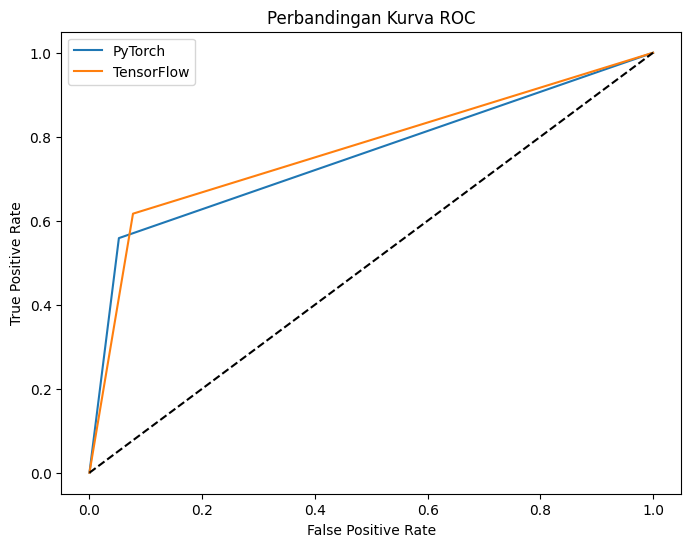

In [88]:
# Membuat kurva ROC
def plot_roc(y_test, y_pred_proba, label):
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=label)

plt.figure(figsize=(8, 6))
plot_roc(y_true, y_pred, "PyTorch")
plot_roc(y_test, y_pred_tf, "TensorFlow")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Perbandingan Kurva ROC")
plt.legend()
plt.show()

Dari perbanding kurva ROC ini, menunjukkan bahwa hasil dari tensorflow sedikit lebih baik dibandingkan PyTorch